# TABLE OF CONTENT
* **1.[DATA EXPLORATION](#DATA_EXPLORATION)<br>** 
  * 1.1 FEATURESET EXPLORATION<br>
* **2.[DATA CLEANING AND PREPROCISSING](#DATA_CLEANING_AND_PREPROCISSING)<br>**
  * 2.1 CHEACK FOR NAN VALUE<br>
  * 2.2 Transforming Skewed Continuous Features<br>
    * 2.2.1 CHECK OUR QUANTITATIVE DATA  IF ITS RIGHT OR LEFT SKEWED<br>
    * 2.2.2 DEALING WITH THE SEKWED DATA<br>
  * 2.3 NORMALIZING NUMERICAL FEATURES<br>
  * 2.4 DEALING WITH CATEGORICAL DATA <br>
  * 2.5 FINAL DATA FOR THE MODEL<br>
<br>
* **3.[EVALUATING MODEL PERFORMANCE](#EVALUATING_MODEL_PERFORMANCE)<br>**
  * 3.1 Evaluation Metrics<br>
    * 3.1.1 CONFUSION MATRIX <br>
    * 3.1.2 ACCURACY<br>
    * 3.1.3 RECALL & PRECISION<br>
    * 3.1.4  F_BETA_SCORE <br>
  * 3.2 NAIVE MODEL <br>
  * 3.3 INFORMATION ABOUT SUPERVISED MACHINE LEARNING ALGORITHMS <br>
    * 3.3.1 DECISION TREES<br>
    * 3.3.2 SUPPORT VECTOR MACHINE<br>
    * 3.3.3  ENSEMBLE METHODS USING ADABOOST METHOD<br>
  * 3.4 DECIDE WHICH CLASSIFIER WE ARE GOING TO USE<br>
    * 3.4.1  CROSS-VALIDATION (K-FOLD METHOD)<br>
    * 3.4.2  CROSS-VALIDATION (SHUFFLE-SPLIT)<br>
    * 3.4.3 LEARNING-CURVE <br>
* **4.[IMPROVING THE SELECTED MODEL](#IMPROVING_THE_SELECTED_MODEL)<br>**
  * 4.1 DESTION TREE CALSSFIER
  * 4.2 HOW GRIDSEARCH WORK <br>
  * 4.3 IMPLEMENTATION OF THE GRID SEARCH<br>
* **5.[PREPARE THE TEST DATA AND TEST THE TUNNIED MODEL](#PREPARE_THE_TEST_DATA_AND_TEST_THE_TUNNIED_MODEL)<br>**
  * 5.1 PREPARE THE TEST SET<br>
  * 5.2 TEST OUR TUNNED AND UNTUNED MODEL WITH TEST DATA<br>

# LIBRARIES 

In [843]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

***
<a id='DATA_EXPLORATION'></a>
# 1.DATA EXPLORATION

## 1.1 FEATURESET EXPLORATION

### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a file
named medical attached with the project proposal.
Every sample consists of 7 features and 1 label(the output target).
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

In [808]:
#load the train data
data=pd.read_csv("medical.txt")

In [809]:
#show the first 5 rows 
data.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,200,clinic,1
1,type4,area2,im,36,b,100,clinic,1
2,type1,area8,chest,45,a,75,hospital,1
3,type1,area5,chest,45,a,30,hospital,1
4,type5,area6,uro,29,a,220,clinic,0


In [810]:
rows,col=data.shape
print(f"the data rows={rows},col={col}")

the data rows=390,col=8


In [811]:
##get the max ,min,std for our quantitative columns
X_quantative_data=["price","exam_price"]
data[X_quantative_data].describe()

,price,exam_price
count,390.000000,390.000000
mean,35.715385,121.205128
std,8.751263,86.729844
min,20.000000,30.000000
25%,29.000000,50.000000
50%,36.000000,80.000000
75%,45.000000,170.000000
max,45.000000,350.000000


In [812]:
## categorical data summary 
X_quantative_data=["price","exam_price","write"] 

data_sum=data.drop(X_quantative_data,axis=1).describe() 

for i in range (len(data_sum)):
    print(f"the column {data_sum.columns[i]},has ({data_sum.loc['unique'][data_sum.columns[i]]}) unique value ,the most repeated  one is ({data_sum.loc['top'][data_sum.columns[i]]}) and is repeated  this many ({data_sum.loc['freq'][data_sum.columns[i]]})")
    print("______________________________________________________________________________________________")
    print("\n")


the column medicine,has (6) unique value ,the most repeated  one is (type1) and is repeated  this many (157)
______________________________________________________________________________________________


the column area,has (8) unique value ,the most repeated  one is (area8) and is repeated  this many (80)
______________________________________________________________________________________________


the column speciality,has (11) unique value ,the most repeated  one is (im) and is repeated  this many (146)
______________________________________________________________________________________________


the column dr_class,has (2) unique value ,the most repeated  one is (b) and is repeated  this many (224)
______________________________________________________________________________________________




In [813]:
data_1=data[data.write==1]#create onlt dataframw with write=1
data_0=data[data.write==0]#create onlt dataframw with write=1

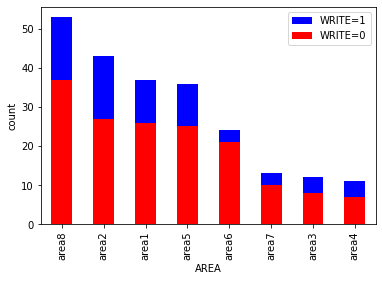

In [814]:
data_1.area.value_counts().plot(kind="bar",color="b",label="WRITE=1")
data_0.area.value_counts().plot(kind="bar",color="r",label="WRITE=0")
plt.xlabel("AREA")
plt.ylabel("count")
plt.legend()

>`observation:` we can see that that the doctor at area 8 and area 2,1,5,6 are more likley to write the the drug


**we want to know what more feature related to doctor in those areas to write the drug**

In [815]:
def count_plot_ctag(data,X_quantative,color):
    ctag_column_name=data.drop(X_quantative_data,axis=1).columns
    ctag_coulmn_no_area=["medicine","speciality","dr_class","clinic_hos"]
    data_catag=data[ctag_column_name] # data frame with only catag columns
    data_catag_area=data_catag.query('area==["area1","area2","area5","area6","area7","area8"]') #catag dataframe with spacific areas
    for i in range (0,3,2):
        plt.subplot(2,2,i+1)
        order_1=data_catag_area[ctag_coulmn_no_area[i]].value_counts().index
        sb.countplot(data=data_catag_area,x=ctag_coulmn_no_area[i],order=order_1,color=color)
        plt.xlabel(ctag_coulmn_no_area[i])
        plt.subplot(2,2,i+2)
        order_2=data_catag_area[ctag_coulmn_no_area[i+1]].value_counts().index
        sb.countplot(data=data_catag_area,x=ctag_coulmn_no_area[i+1],order=order_2,color=color)
        plt.xlabel(ctag_coulmn_no_area[i+1])
        
        '''this fuction will take  dataframe ,and the list of quantive column then drop these column from the data frame
        and the data frame will be left with the catag columns only and then countplot the catag column in it with respect to spacific area 
        area1","area2","area5","area6","area7","area8
        '''

C:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


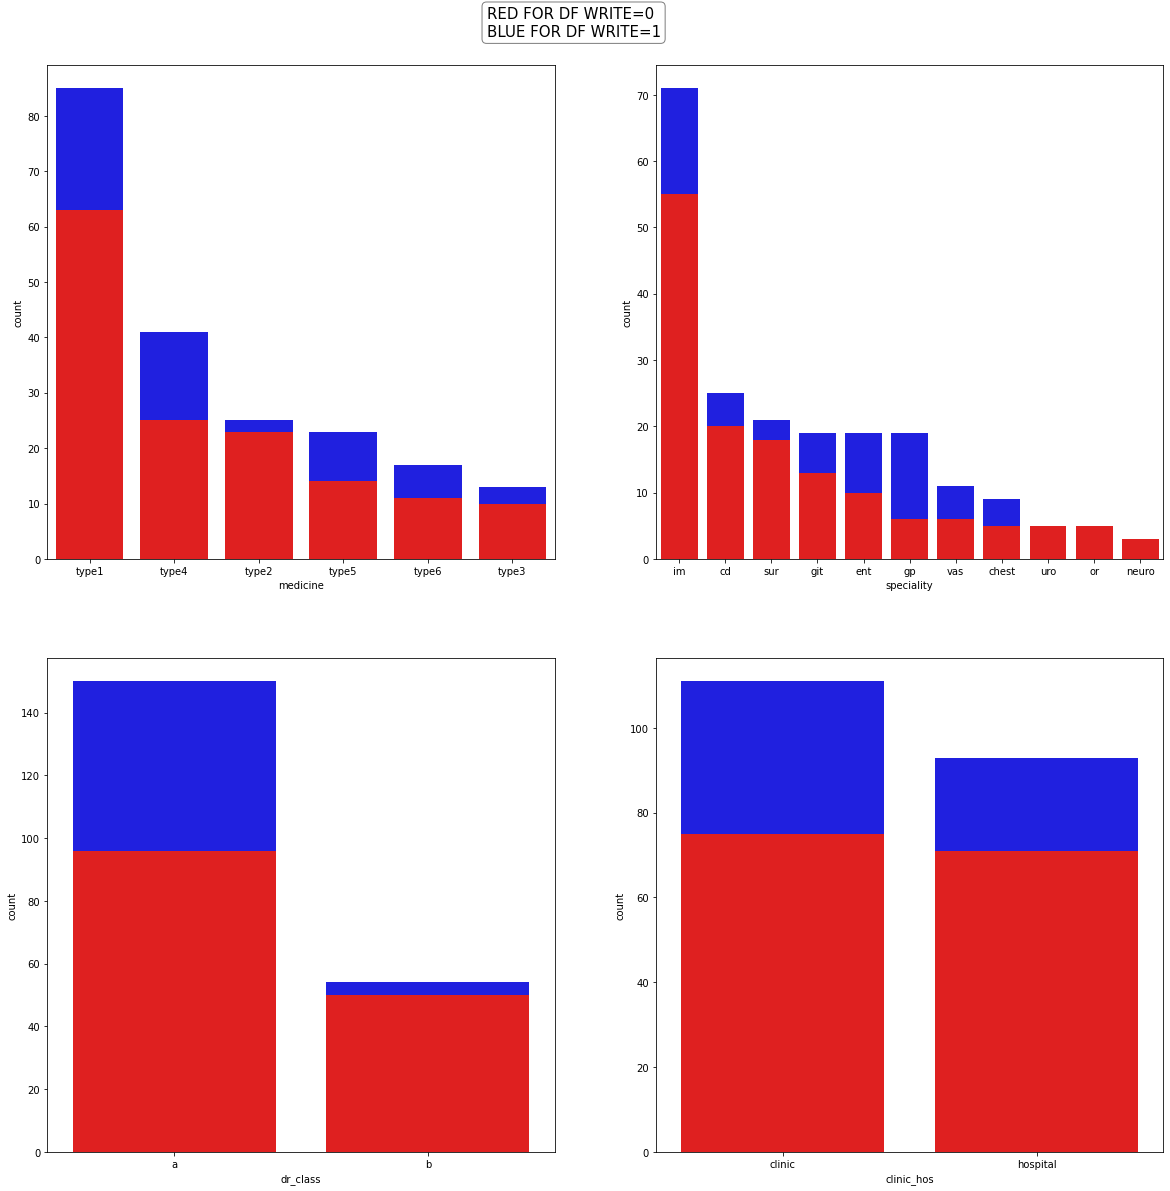

In [816]:
plt.figure(figsize=[20,20])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr="RED FOR DF WRITE=0\nBLUE FOR DF WRITE=1"
# place a text box in THE PLOT
plt.figtext(0.43,0.9,s=textstr,fontsize=15,bbox=dict(boxstyle='round', facecolor='none', alpha=0.5))

count_plot_ctag(data_1,["price","exam_price"],color="b") ## count plot for catag column in dataframe.write==1 with respect to area [1,2,5,8,7,6]
count_plot_ctag(data_0,["price","exam_price"],color="r") ## count plot for catag column in dataframe.write==0 with respect to area [1,2,5,8,7,6]

>`observation`
we can see from the figure above dr with class a and specialize in IM and his and the appointment took place at his clinic 
the medicine from type 1 w can say there is a strong probability to write that medicine to the patient 

***
<a id='DATA_CLEANING_AND_PREPROCISSING'></a>
________________
# 2.DATA CLEANING AND PREPROCISSING

## 2.1 CHEACK FOR NAN VALUE

In [817]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   medicine    390 non-null    object
 1   area        390 non-null    object
 2   speciality  390 non-null    object
 3   price       390 non-null    int64 
 4   dr_class    390 non-null    object
 5   exam_price  390 non-null    int64 
 6   clinic_hos  390 non-null    object
 7   write       390 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 24.5+ KB


>`observation:`as we can see there is no NaN value in each column


In [818]:
print(f"the number of NaN=={data.isnull().sum().sum()}")

the number of NaN==0


## 2.2 Transforming Skewed Continuous Features
some quantitative data distribution may bey skewed to right or left so we want it to transform it to be normally distributed 
sample of skewed shown in the figure below
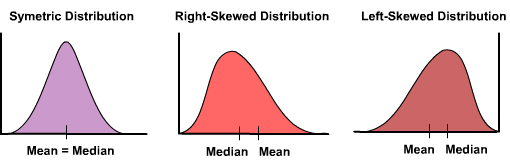


### 2.2.1 **CHECK OUR QUANTITATIVE DATA  IF ITS RIGHT OR LEFT SKEWED**

Text(0.5, 1.0, 'exam_price')

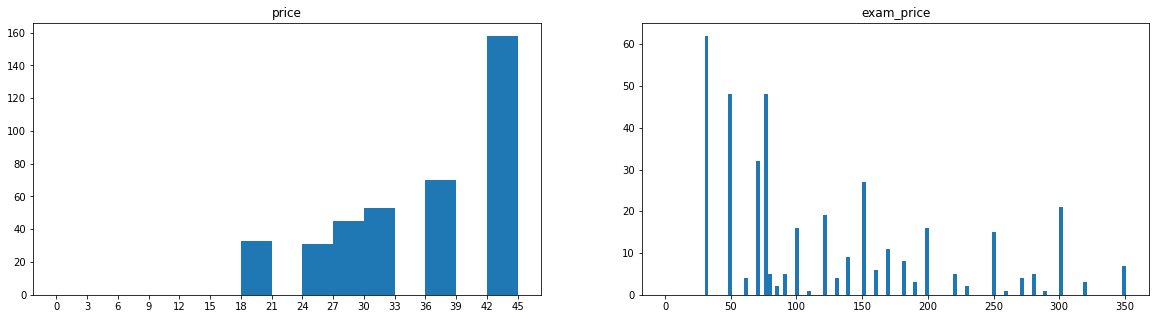

In [819]:
plt.figure(figsize=[20,5])
X_quantative_data=["price","exam_price"]
plt.subplot(1,2,1)
bins = np.arange(0, data["price"].max() + 3,3)  ## because i want to start from
plt.hist(data=data, x="price", bins=bins)
plt.xticks(bins)
plt.title("price")
plt.subplot(1,2,2)
bins = np.arange(0, data["exam_price"].max() + 3,3)  ## because i want to start from
plt.hist(data=data, x="exam_price", bins=bins)
plt.title("exam_price")


>`observation:` we can say the `price` is left-skewed (negative-skewed) and `exam_price` is right-skewed(positive-skewed) <br>but the distribution  of the values are highly separated so we need to transform it using log transformation

### 2.2.2 **DEALING WITH THE SEKWED DATA**

we want to make the data normally distributed so it can make it easier on our model to predict so we will try to tansform our data the same way as it showen below in the fiqure as it showen below  we will use  and [`np.log()`](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
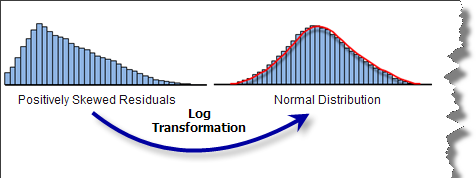
[HOW TO DEAL WITH SEKWED DATA .MORE INFORAMTION_1](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55)<br>
[HOW TO DEAL WITH SEKWED DATA .MORE INFORAMTION_2](https://www.google.com.eg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiLsZ-y047sAhUlz4UKHT9fCqoQFjAAegQIAxAB&url=http%3A%2F%2Fcore.ecu.edu%2Fpsyc%2Fwuenschk%2FStatHelp%2FNegSkew.pdf&usg=AOvVaw3BkunPSNU3tPE0Ggcc0x7Z)

In [820]:
#transform the exam_price data
data["exam_price_log"]=np.log(data["exam_price"])

Text(0.5, 1.0, 'exam_price_log')

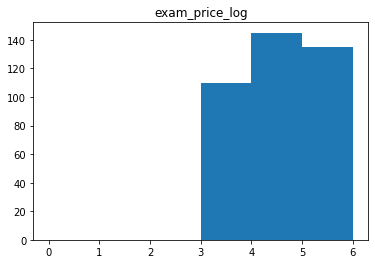

In [821]:
#plot the exam_price after transformation
bins=np.arange(0,data["exam_price_log"].max()+1,1)
plt.hist(data=data,x="exam_price_log",bins=bins)
plt.title("exam_price_log")


## 2.3 NORMALIZING NUMERICAL FEATURES
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'price'` or `'exam_price_log'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

 We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this. <br>[information abour MinMaxscaler](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

In [822]:
from sklearn.preprocessing import MinMaxScaler#import the MinMaxscaller
#X_quantative_data=["price","exam_price"]

X_quantative_data=["price","exam_price_log"]

# take each value in the exam_price_log , price and and make bettwen 0 and 1
data[X_quantative_data]=MinMaxScaler().fit_transform(data[X_quantative_data])

#show the first 5 rows of the new data
data.head() 

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write,exam_price_log
0,type1,area1,chest,1.00,a,200,clinic,1,0.772212
1,type4,area2,im,0.64,b,100,clinic,1,0.490070
2,type1,area8,chest,1.00,a,75,hospital,1,0.372971
3,type1,area5,chest,1.00,a,30,hospital,1,0.000000
4,type5,area6,uro,0.36,a,220,clinic,0,0.811007


## 2.4 DEALING WITH CATEGORICAL DATA 


**From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`**. we will use [`pd.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |



In [823]:
data_dum= pd.get_dummies(data) #get the dummies value for the catag data
data_dum.head()

,price,exam_price,write,exam_price_log,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,200,1,0.772212,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.64,100,1,0.490070,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
2,1.00,75,1,0.372971,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.00,30,1,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.36,220,0,0.811007,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0


## 2.5 FINAL DATA FOR THE MODEL   
at this section we will get the X_train ,y_train for our model

In [824]:
data_dum.drop("exam_price",axis=1,inplace=True) # drop eexam-price column 
y_train=data_dum["write"] 
X_train=data_dum.drop('write',axis=1) # drop write column and use the remainig columns for training
X_train.head()

,price,exam_price_log,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,area_area2,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,0.772212,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.64,0.490070,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,1.00,0.372971,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.00,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.36,0.811007,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


***
<a id='EVALUATING_MODEL_PERFORMANCE'></a>



# 3.EVALUATING MODEL PERFORMANCE
In this section, we will investigate four different algorithms, one of them is the naive model and the others are 3 different models we will try to choose one of them.

## 3.1 Evaluation Metrics
Evaluation metrics are used to measure the quality of the statistical or machine learning model. Evaluating machine learning models or algorithms is essential for any project. There are many different types of evaluation metrics available to test a model. These include classification accuracy, logarithmic loss, **`confusion matrix`**, and others at this projct we will take 
the confusion matrix as Evaluation Metrics to test our model 


### 3.1.1 CONFUSION MATRIX
A confusion matrix provides a summary of the predictive results in a classification problem. Correct and incorrect predictions are summarized in a table with their values and broken down by each class as showen in the figure below .<br>


| | Predicted(1) | Predicted (0) |
|----|----|----|
| Actual(1) | T+ | F-
| Actual(0) | F+ | T-


`T+`  ->`True positive`->means that our model predicted after trained that doctor wrote (1) the medicine and it actually wrote it(1)<br>
`T-`  ->`True negative`->means that our model predicted after trained that doctor didn't write (0) the medicine and it actually didn't write it(0)<br>

`F+`  ->`False positive`->means that our model predicted after trained that doctor wrote (1) the medicine and it actually didn't write it(0)<br>
`F-`  ->`False negative`->means that our model predicted after trained that doctor didn't write (0) the medicine and it actually actually wrote it(1)<br>

### 3.1.2 ACCURACY
accuracy is a method  from different other methods to determine how good is  our model 
 
$$Accuracy Rule=\frac{T_++T_N}{T_+  + F_+ + F_-+T_-}$$

`but some times it is not the best way the determine how of our model do because it can give us high value even if the model is bad`  

`EX:` we want our model to predict if this  financial process is  fraud or good .If the confusion matrix of our model was like below table 

| | Predicted(good) | Predicted (fraud) |
|----|----|----|
| Actual(good) | T+ (400) | F- (0)
| Actual(fraud) | F+(90) | T-(0)

we can see the model predicted 400 process that was good as good procees`T+` and 90 was fraud predicted as good `F+`.Furthermore, our model didn't even predict the fraud process that was actually fraud `T-=0` 

if we use the `Accuracy Rule` =$\frac{400+0}{400  + 90 + 0+0}=0.816 % $
we got a  high value for Accuracy which consider as good thing but it is giving a false indication about a bad model because it didn't predict any  fraud process as fraud isted it predicted it as good


### 3.1.3 RECALL & PRECISION
another method better than the accuracy to determine how good is our model.

`Recall`: out of all point from specific class how many point did our model predict as this specific class <br>

$$Recall Rule=\frac{T_+}{T_+  + F_-}$$ <br>


`Precision`: out of all point that our model predicted as specific class ,how many point is right related to this specific class  <br>

$$Precision Rule=\frac{T_+}{T_+  + F_+}$$

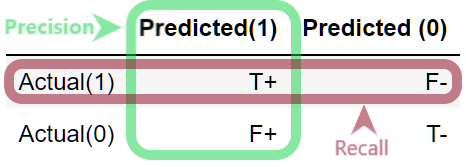



### 3.1.4  F_BETA_SCORE 
if we calculate the Recall and Precision we cant detemine how good is our model beacue we have two value to decide between them 
**$F_{\beta}score$** is compine the two value and give us one numrical conclusion about how good is our model the higher of it teeling us that our model doing good and all of that is depening on the recall and Precision


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


Moreover,in **$F_{\beta}score$** the ${\beta}$ value can change from 0 to 3 depending on what we care about it the most precision or recall :<br>
**$F_{0},F_{0.5}$** we care more about `Precision`<br>
**$F_{1}$** we care  about the both `Precision`,`Recall`<br>
**$F_{2},F_{3}$** we care more about `Recall`<br>

in this project we care the most about the doctor that will write the medicine so we care about our model to predict (1) meaning by that we care about the T+ and F+  as result  we will use $F_{0.5}$
$$ F_{0.5} = (1.25) \cdot \frac{precision \cdot recall}{\left(0.25 \cdot precision \right) + recall} $$



[`reference`](https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb)

## 3.2 NAIVE MODEL 

at this section, we will create a model the predict all of the point as `1` meaning by that the `T+`,`F+` will have value and `T-`,`F-` will be equal to zero because we don't have any point predicted as `0`

In [825]:
T_P=len(data_dum[data_dum.write==1]) 
F_P=len(data_dum)-T_P
T_N=0
F_N=0
P=T_P/(T_P+F_P) # Precision
R=T_P/(T_P+F_N) # Reacll the value of it will be 1 because F_N=O

accuracy=(T_P+T_N)/(T_P+T_N+F_N+F_P)
beta = 0.5
fscore =(1+ beta**2)*((P * R)/((beta**2*P)+R))

print(f"the accuracy={accuracy}, the F_0.5_SCORE={fscore}")


the accuracy=0.5871794871794872, the F_0.5_SCORE=0.6400223588596982


>we can say that we need to improve our model accuracy and f_score to be higher than the naive model result as shown above

## 3.3 INFORMATION ABOUT SUPERVISED MACHINE LEARNING ALGORITHMS 
In this section, we will discuss simple information like (advantages , disadvantages,why it is good to use it with our project, and real-life application) for three supervised machine learning algorithms for classification




### 3.3.1 DECISION TREES:
                                            



**Real world applications:** 
**`Energy consumption`** 

concerns how much electricity has been used by individuals. The investigation of energy consumption becomes an important issue as it helps utility companies identify the amount of energy needed. Although many existing methods can be used for the investigation of energy consumption, decision trees appear to be preferred. This is due to the fact that a hierarchical structure provided by decision trees is useful to present the deep level of information and insight. For instance, Tso and Yau (2007) create a decision tree model to identify the relationships between a household and its electricity consumptions in Hong Kong. Findings from their tree model illustrate that the number of household members are the most determinant factor of energy consumption in summer, and both the number of air-conditioner and the size of a flat are the second most important factors. In addition to such findings, their tree model identifies that a household with four or more members with a flat size larger than 817 ft2 is the highest electricity consumption group. On the other hand, households which have less than four family members and without air-conditioners are the smallest electricity consumption group. Such findings from decision trees not only provide a deeper insight of the electricity consumptions within an area but also give guidelines to electricity companies about the right time they need to generate more electricity.[1]<br>



**Strengths of Decision Trees**<br>


- Decision trees implicitly perform variable screening or feature selection [2]<br>
- Decision trees require relatively little effort from users for data preparation [2]<br>
- Nonlinear relationships between parameters do not affect tree performance [2]<br>
- The best feature of using trees for analytics - easy to interpret and explain to executives [2]<br>
- Decision trees can handle both categorical and numerical variables at the same time as features. [5]<br>


**Weaknesses of Decision Trees** :<br>


- They can be extremely sensitive to small perturbations in the data where a slight change can result in a drastically         different tree. [3]<br>
- They can easily overfit. This can be negated by validation methods and pruning, but this is a grey area. [3]<br>
- Need to discrete data for some particular construction algorithm [4]<br>


**What makes this model a good candidate for the problem ?**<br>

in my openion because of Decision trees can handle both categorical and numerical variables
Every split in a decision tree is based on a feature. If the feature is categorical, the split is done with the elements belonging to a particular class. If the feature is contiuous, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. This will be done according to an impurity measure with the splitted branches. And the fact that the variable used to do split is categorical or continuous is irrelevant (in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).[5]<br>

so i will not need alot of data preparation before buildong my model<br>






**References:**<br>


http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/ [1]

http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics  [2]

https://stats.stackexchange.com/questions/1292/what-is-the-weak-side-of-decision-trees [3]

https://www.researchgate.net/post/What_are_pros_and_cons_of_decision_tree_versus_other_classifier_as_KNN_SVM_NN [4]

https://datascience.stackexchange.com/questions/32622/how-to-make-a-decision-tree-when-i-have-both-continous-and-categorical-variables [5]






### 3.3.2 **SUPPORT VECTOR MACHINE**
**Real world applications:** **`Face Recognition`**

Support Vector Machines Applied to Face Recognition
Face recognition is a K class problem, where K is the number of known individuals; and support vector machines (SVMs) are a binary classification method. By reformulating the face recognition problem and re-interpreting the output of the SVM classifier, we developed a SVM-based face recognition algorithm. The face recognition problem is formulated as a problem in difference space, which models dissimilarities between two facial images. [6]

**Strengths of SVM:** <br>
<br>
SVM works well in complicated domanis where there is a clear margin of sepration [7]<br>
this model is good with high dimensional spaces(a lot of features) [7]<br>

**Weaknesses of SVM:**<br> 

SVM doesn't perfrom well in very large data sets because the training time happens to be cubic in the size of the data set[7]<br>
SVM doesn't perfrom well with a lot of noise[7]<br>

**What makes this model a good candidate for the problem ?**<br>
<br>
sample size is not too small and at the same time is not too large so our data size is suitable for using SVM[7]<br>
it will work with a lot of features which we aready have [7]<br>
we can change kernel parameters to get the best model to test data<br>

**References:**<br>

https://www.nist.gov/publications/support-vector-machines-applied-face-recognition [6]

https://www.youtube.com/watch?v=U9-ZsbaaGAs [7]


### 3.3.3  **ENSEMBLE METHODS USING ADABOOST METHOD**

**Real world applications:**<br>
              
Application of AdaBoost Algorithm in Basketball Player Detection [8]<br>

**Strengths of AdaBoost :**<br>
<br>
simple models (weak learner)can be compined to build a better model(strong learner)[9]<br>
AdaBoost capture hard decision boundaries [9]<br>
AdaBoost can achieve similar classification results with much less tweaking of parameters [9]<br>
<br>
**Weaknesses of Adaboost :**<br>

AdaBoost can be sensitive to noisy data and outliers[9]<br>

**What makes this model a good candidate for the problem ?** <br>
<br>
it will give us strong quallity specially our data is not so noisy<br>

**References:**<br>

https://www.uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf [8]

http://www.nickgillian.com/wiki/pmwiki.php/GRT/AdaBoost [9]

## 3.4 DECIDE WHICH CLASSIFIER WE ARE GOING TO USE
in this section we will use three classifiers (SVM, Decision tree, AdaBoost) we will see the fscore and accuracy of each one in the train set and we will plot the learning curve for each one of them to decide which one is we are going to use 

In [826]:
#import the metrics and classifiers we are going to use
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_SVM=SVC(random_state=0) 
model_DT=DecisionTreeClassifier(random_state=0)
model_AB=AdaBoostClassifier(random_state=0)

#train our models
model_SVM.fit(X_train,y_train)
model_DT.fit(X_train,y_train)
model_AB.fit(X_train,y_train)

# use the model to predict
y_pred_SVM=model_SVM.predict(X_train)
y_pred_DT=model_DT.predict(X_train)
y_pred_AB=model_AB.predict(X_train)

#Accuracy for different models
acc_SVM=accuracy_score(y_train,y_pred_SVM)
acc_DT=accuracy_score(y_train,y_pred_DT)
acc_AB=accuracy_score(y_train,y_pred_AB)

#Fscore for different models
fbeta_SVM=fbeta_score(y_train,y_pred_SVM,beta=0.5)
fbeta_DT=fbeta_score(y_train,y_pred_DT,beta=0.5)
fbeta_AB=fbeta_score(y_train,y_pred_AB,beta=0.5)


print(f"model SVM ,ACC={acc_SVM},F_BETA={fbeta_SVM}")
print(f"model DT ,ACC={acc_DT},F_BETA={fbeta_DT}")
print(f"model AB ,ACC={acc_AB},F_BETA={fbeta_AB}")


model SVM ,ACC=0.764102564102564,F_BETA=0.7921207041072926
model DT ,ACC=0.9102564102564102,F_BETA=0.9377859103385178
model AB ,ACC=0.7666666666666667,F_BETA=0.789259560618389


>`observation` we can see the fscore and accuracy of DecisionTreeClassifier is higher than the other model but, it might be not a good thing because it can be an overfitting classifier so we need to test the model on test data and because we right now we don't have a test data set we will use the Cross-validation sets method 

### 3.4.1  CROSS-VALIDATION (K-FOLD METHOD)

because we don't have a test data to see how our model will do on test data we will use the K-fold method the creat test data separated from the train data 

K-fold: it will separate the train set into numbers od subsets == k  and in each time it will take one subset as a test set and the remaining subsets will be train sets as it is shown below in the figure

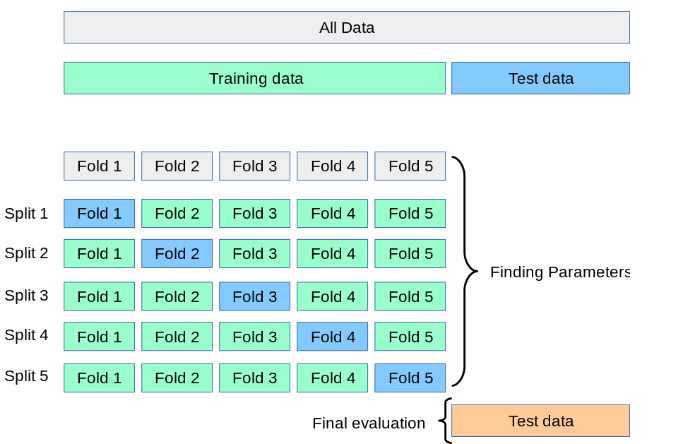


it will iterate a number of times k  (folds) and each time will take subset from the train data as test set, in the figure above the K=5  and  in each fold it will calculate the fscore for the train and cv sets then take the average of all of fscore at each folds to be the final fscore for the model 

EX-in python 

In [827]:
x=range(12) ##x=12 number
from sklearn.model_selection import KFold
v=KFold(n_splits=3,shuffle=True) ### kfold(n_splits == k == 3 == the number of test set we need)
for train ,test in v.split(x):
    print("train",train,"test",test)

train [ 0  1  2  3  4  5  9 11] test [ 6  7  8 10]
train [ 0  1  2  5  6  7  8 10] test [ 3  4  9 11]
train [ 3  4  6  7  8  9 10 11] test [0 1 2 5]


>`observation:`<br>
[ 0  1  3  6  7  8  9 11] (train set ) [x/3,x/3]  [ 2  4  5 10] (cv set) [x/3]<br>
<br>
[ 0  2  3  4  5  8  9 10] (train set ) [ 1  6  7 11] (cv set) <br>
<br>
[ 1  2  4  5  6  7 10 11] (train set ) [0 3 8 9]     (cv set) <br>
<br>
each number from x has been taken only once as a test point and in each iteration , we can't control the size of the test set it will always the number of the train set divided by `k number of folds`

### 3.4.2  CROSS-VALIDATION (SHUFFLE-SPLIT)
it will iterate around the train set and select random points to be in the test set not like the k-fold it will not take a subset from the train set but it will take random points from the train set and assign it as a test set. Furthermore, at this method, we can set the number of points we want in the train set or test set in every iteration.<br> 
<br>
EX python:

In [828]:
from sklearn.model_selection import ShuffleSplit
x=np.array(range(12)) # create array of size 12 from number (0 to 11)
rs=ShuffleSplit(n_splits=10,test_size=3,train_size=None,random_state=0)
#n_splits=k=we want to iterate around the train set 10 times and create 10 test data
#test_size= how many number we want in every test set
for train,test in rs.split(x):
    print("train",train,"test",test)

train [10  2  8  1  7  9  3  0  5] test [ 6 11  4]
train [ 4  9  0 11  7  6  1 10  8] test [5 2 3]
train [ 2  7  5 11  0  3  4  9  8] test [ 6  1 10]
train [ 9  5  6  1  0  7 10 11  3] test [2 4 8]
train [ 5 11  2  8  6  3  7  4 10] test [1 9 0]
train [ 9  8  1 11  0  6 10  5  4] test [3 7 2]
train [ 2  5  3 11  9  7 10  1  8] test [0 6 4]
train [ 7  9  6  8 10  4  5  3  0] test [ 1  2 11]
train [ 1  0  6  5  2  3 11  8  4] test [ 9  7 10]
train [ 8  6  4  2  1 10  5  0  3] test [11  9  7]


>`observation:`<br>
we can say that in every iteration the numbers at the train test can be taken as  rain point two or more times 

### 3.4.3 LEARNING-CURVE 
at this section we will dray the learning curve for each model .meaning by learning curve we want to know the fsocre on the train set and the CV set when we take 10%---to--100% of the train set


In [829]:
def draw_learning_curve(x,y,estmatur,num_trainig,name_model): ### esmatatur= the model wee need to use ,num_training =how many row in train score list
    # import the functions we need
    from sklearn.model_selection import learning_curve
    from sklearn.model_selection import ShuffleSplit
    from sklearn.metrics import make_scorer,fbeta_score 
    
    #create the cv set with 0.2 from the train set 
    cv2=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0) 
    
    #create train set from the origrnal train set [10% form the  train set,--to-->,100% from the train set]
    train_sizes=np.linspace(0.1,1.0,num_trainig)

    #create fbeta_score scoring object using make_scorer()
    scorer = make_scorer(fbeta_score, beta = 0.5)
    
    #create the learning curve
    train_size,train_scores,test_scores=learning_curve(estimator=estmatur,X=x,y=y,train_sizes=train_sizes,cv=cv2,n_jobs=1,scoring=scorer)
    train_scores_mean=np.mean(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    
    
    #get the fscore for train and cv after train 100% of the train points
    print(f"the cv set fscore = {test_scores_mean[9]}")
    print(f"the train fscore  = {train_scores_mean[9]}")
    
    
    ####ploting part--------------------------------------------------------------------------------------------------
    plt.figure(figsize=[10,10])
    plt.grid()
    plt.title(f"the learning curve for {name_model} model ")
    plt.xlabel("training example 10%---->100% from the train groups")
    plt.ylabel("f1_score for ech mean in the train_score_mean, test_score_means")
    plt.xticks(train_size)
    plt.plot(train_size,train_scores_mean,"-o",color="g",label="train_score")
    plt.plot(train_size,test_scores_mean,"-o",color="r",label="test_score")
    plt.legend(loc="best")
    plt.show()

    '''
    this function will take the model and x_train,y_train and 
    the name of the model it will give the learning curve of the input model and the final CV ,train fscore  after train the 100% 
    of the train points
    '''

the cv set fscore = 0.7585132953163507
the train fscore  = 0.7975478966909653


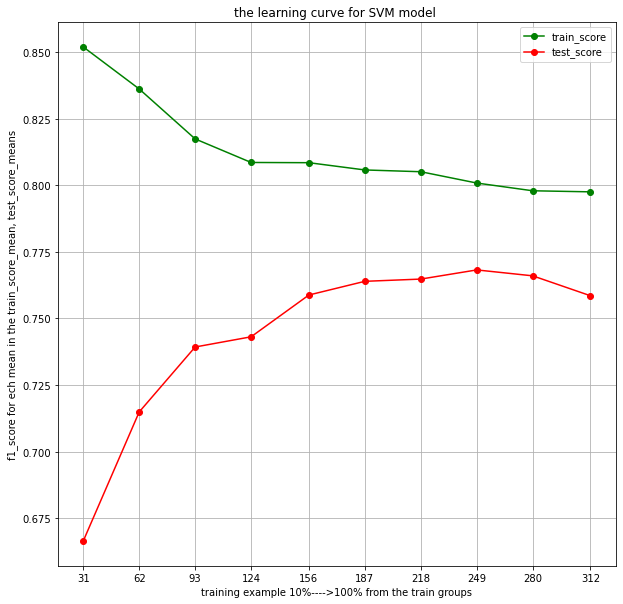

In [830]:
model_SVM=SVC(random_state=0) 
model_DT=DecisionTreeClassifier(random_state=0)
model_AB=AdaBoostClassifier(random_state=0)


draw_learning_curve(X_train,y_train,model_SVM,10,"SVM")


>`observation:`if we looked at the SVM model we can see that the train score vary some times its increasing some times it is decreasing and it give after train all the train point `fscore train (79%)`and `test =(75.8%)`

the cv set fscore = 0.757958111508527
the train fscore  = 0.7915981565208662


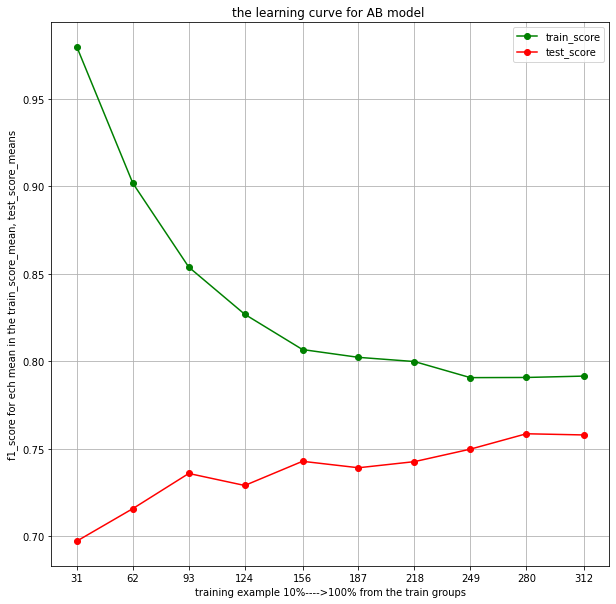

In [831]:
draw_learning_curve(X_train,y_train,model_AB,10,"AB")

>`observation:`<br>
but if we looked at the AB model we can see that after trained all the train points it gives `fscore training =(79%)`,` test=(75.7%)` <br>


the cv set fscore = 0.7520964002636974
the train fscore  = 0.9422214466895975


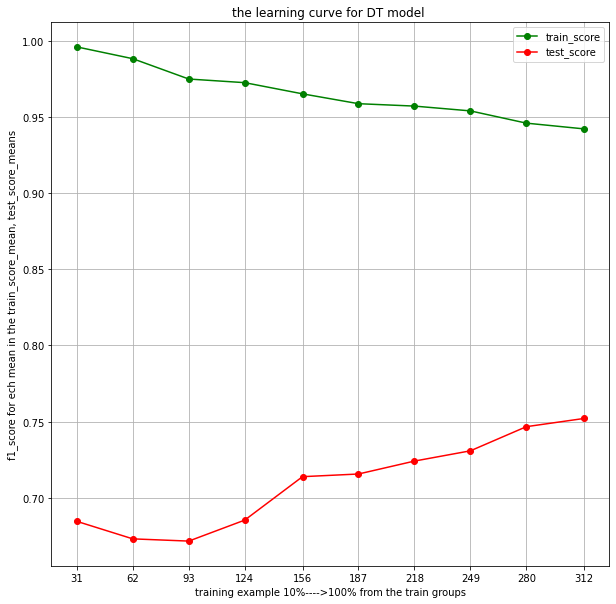

In [832]:
draw_learning_curve(X_train,y_train,model_DT,10,"DT")


>`observation:` we can say that the DT model is overfitting the data and it gives a high fscore `(94.2%) on the train` set and `score ==( 75.2% )at the test set` so because of that, we will try to improve the result of this model because even it is overfitting the data it is giving a good fscore so we might improve that score by tuning. Moreover, we can say that our model is suitable for our data because the fscore of the training each time we increase the training point as shown in the figure above we can see it gives a high score meaning by that the model is comfortable with dealing with this type of data .

>we can say also it gives the same fscore as the two models `AB`, `SVM` and its overfitting the data so if we tried to tune the model it can improve the result of the fscore


<a id='IMPROVING_THE_SELECTED_MODEL'></a>
# 4.IMPROVING THE SELECTED MODEL  
at this section we will try to improve the score of our selected model which it is DecisionTreeClassifier by tuning it's paramters and select the best pair of paramters usnig `klearn.model_selection.GridSearchCV`[sk.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid#sklearn.model_selection.GridSearchCV)


## 4.1 DESTION TREE CALSSFIER
if `we have train set as showen below `



| |  Feature_1 | Feature_2 | Traget |
|----|----|----|----|
| 1|value | value|1|
| 2| value | value|0|
| N| ... | ...|...|


<br>
where <br>

`1-->for class A`
<br>
`0-->for class B`
<br>


the desction tree will take the traget clolumn all of its value in one node called the root node then it will choose one of the feature table to split this node into differnt nodes caled `children node` till each point of class A be in one node and the other clas be in another node.The DecisionTreeClassifier  will chooce one feature to split all the point at root nood to its spacific class with minimizing the missclasified point .the algrothim will use the `information gain` and `Entropy`

`information gain`:tell the model a numrrical summery rlated to how this slected feature gives infromtation about sapcifc class
it's value between 0->1 the higher of it meangin that the slected feature will be the best split for this nood it is calculated using the `Entropy` which it is the oppoiste of the `information gain` it tell us if the points at the  root noode is from one class or not if it from one calss  `Entropy=0` if it is from diffrent classes it will have value between 0,1  





## 4.2 HOW GRIDSEARCH WORK 
grid-search work by trying different values of specific parameter with a different value of other parameters and each time it calculates the fscore the best model will be the highest fscore for CV Test .meaning by that it will take the value of parameter 1 and the value of parameter _2  at this highest fscore value.

| | PARAMETER_2_value_1 | PARAMETER_2_value_2 |
|----|----|----|
| PARAMETER_1_value_1 |fscore(50%) | fscore(60%)
| PARAMETER_1_value_2 | fscore(80%) | fscore(70%)

<br>
it will select the value for the parameter with highest fscore for our model 
<br>

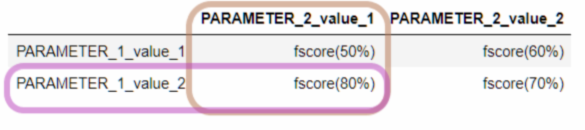


## 4.3 IMPLEMENTATION OF THE GRID SEARCH
at this section will use the gridsearch method on the DecisionTreeClassifier to get the best model

In [833]:
#import needed libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
#create the cv set
cv2=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0) 
print("DONE CREATE CV SET_____________________________________________________________________________________________________")

#create f_beta_score with beta=0.5
scorer=make_scorer(fbeta_score, beta = 0.5)
print("DONE MAKING SOCRER_____________________________________________________________________________________________________")

#set different value for the parameters to compare between them
parameters= {'max_depth': [10,20], 'min_samples_split': [3,4,5],"min_samples_leaf":[2,3,4,5]}
print("DONE PREPARING THE PARAMETERS__________________________________________________________________________________________")

#set the model we will use
model=DecisionTreeClassifier(random_state=0)
print("DONE SETTING THE MODEL_________________________________________________________________________________________________")

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV() on the cv-set created by cv2
grid_obj =  GridSearchCV(model, parameters,scoring=scorer)
print("DONE THE GRIDSEARCH PART-1_____________________________________________________________________________________________")

#fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit =grid_obj.fit(X_train, y_train)
#print(grid_fit)
print("DONE THE GRIDSEARCH PART-2_____________________________________________________________________________________________")

# Get the best parameters value for the model
best_clf_DT = grid_fit.best_estimator_
print("DONE THE GRIDSEARCH PART-3_____________________________________________________________________________________________")

print(f"the best model={best_clf_DT}")

DONE CREATE CV SET_____________________________________________________________________________________________________
DONE MAKING SOCRER_____________________________________________________________________________________________________
DONE PREPARING THE PARAMETERS__________________________________________________________________________________________
DONE SETTING THE MODEL_________________________________________________________________________________________________
DONE THE GRIDSEARCH PART-1_____________________________________________________________________________________________
DONE THE GRIDSEARCH PART-2_____________________________________________________________________________________________
DONE THE GRIDSEARCH PART-3_____________________________________________________________________________________________
the best model=DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3,
                       random_state=0)


START PLOTTING_________________________________________________________________________________________________________
the cv set fscore = 0.7650635909193438
the train fscore  = 0.8862534725289699


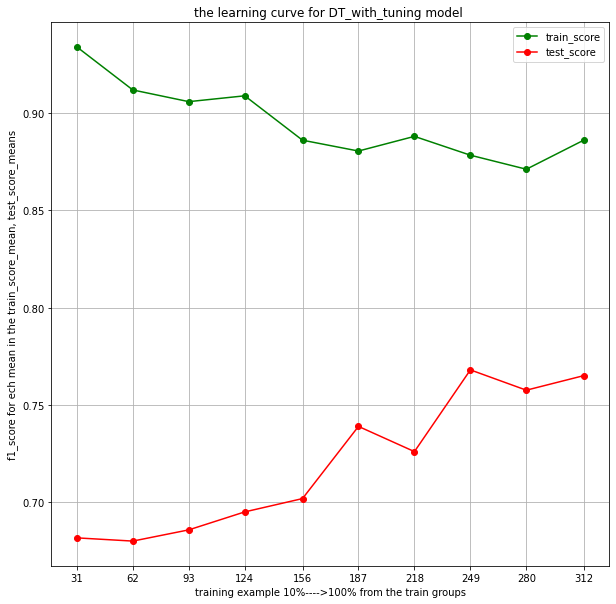

In [834]:
print("START PLOTTING_________________________________________________________________________________________________________")

draw_learning_curve(X_train,y_train,best_clf_DT,10,"DT_with_tuning")


>`observation`<br>we can see there is imporvemnt in the fscore for our DT model after tuning

| | **tuned DT** | **untuned DT** |
|----|----|----|
| **$f_{0.5 score}$**|**0.7650**| **0.7520**


<a id='PREPARE_THE_TEST_DATA_AND_TEST_THE_TUNNIED_MODEL'></a>
# 5.PREPARE THE TEST DATA AND TEST THE TUNNIED MODEL 
we will do the same preparing and the preprocessing for the test data the same way as the train data

## 5.1 PREPARE THE TEST SET 

In [835]:
#load the test data
test=pd.read_csv("testing.txt")

In [836]:
# convert the exam_price the same way as it done at the train set
test["exam_price_log"]=np.log(test["exam_price"])


In [837]:
from sklearn.preprocessing import MinMaxScaler#import the MinMaxscaller
X_quantative_data=["price","exam_price_log"]
#X_quantative_data=["price","exam_price"]

# take each value in the exam_price_log , price and and make bettwen 0 and 1
test[X_quantative_data]=MinMaxScaler().fit_transform(test[X_quantative_data])

#show the first 5 rows of the new data
test.head(5)

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write,exam_price_log
0,type1,area1,chest,1.00,a,220,clinic,1,0.811007
1,type1,area4,im,1.00,b,90,hospital,1,0.447184
2,type1,area2,gp,1.00,b,60,hospital,1,0.282142
3,type1,area3,im,1.00,a,180,clinic,0,0.729325
4,type4,area8,chest,0.64,a,75,hospital,0,0.372971


In [838]:
test=test.drop("exam_price",axis=1)
test.head()

,medicine,area,speciality,price,dr_class,clinic_hos,write,exam_price_log
0,type1,area1,chest,1.00,a,clinic,1,0.811007
1,type1,area4,im,1.00,b,hospital,1,0.447184
2,type1,area2,gp,1.00,b,hospital,1,0.282142
3,type1,area3,im,1.00,a,clinic,0,0.729325
4,type4,area8,chest,0.64,a,hospital,0,0.372971


In [839]:
test_dum= pd.get_dummies(test) #get the dummies value for the categorical test data
test_dum.head()

,price,write,exam_price_log,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,area_area1,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,1.00,1,0.811007,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1.00,1,0.447184,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,1.00,1,0.282142,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.00,0,0.729325,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0.64,0,0.372971,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [840]:
#create X_tes,y_test
X_test=test_dum.drop("write",axis=1)
y_test=test_dum["write"]


## 5.2 TEST OUR TUNNED AND UNTUNED MODEL WITH TEST DATA

In [841]:

#tuned model
T_model=best_clf_DT
#T_model=DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,random_state=0)
#untuned model
UN_model=DecisionTreeClassifier(random_state=0)

#import the metrics and classifiers we are going to use
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier


#THE UNTUNED MODEL

#train our  untuning model
UN_model.fit(X_train,y_train)

# use the model to predict
y_pred_UN=UN_model.predict(X_test)

#Accuracy for the untuning model
acc_UN=accuracy_score(y_test,y_pred_UN)

#Fscore for different models
fbeta_UN=fbeta_score(y_test,y_pred_UN,beta=0.5)



#THE TUNED MODEL

#train our  untuning model
T_model.fit(X_train,y_train)

# use the model to predict
y_pred_T=T_model.predict(X_test)

#Accuracy for the untuning model
acc_T=accuracy_score(y_test,y_pred_T)


#Fscore for different models
fbeta_T=fbeta_score(y_test,y_pred_T,beta=0.5)

print("UN TUNED MODEL \n")
print(f"fscore={fbeta_UN}-----------accuracy={acc_UN}")
print("________________________________________________________________")
print("TUNED MODEL \n")
print(f"fscore={fbeta_T}-----------accuracy={acc_T}")

UN TUNED MODEL 

fscore=0.797872340425532-----------accuracy=0.7666666666666667
________________________________________________________________
TUNED MODEL 

fscore=0.8536585365853658-----------accuracy=0.8


>`observation`<br>we can see there is imporvemnt in the fscore and accuracy for our DT model after tuning On the test daata

| | **untuned DT** | **tuned DT** |
|----|----|----|
| **$f_{0.5 score}$**|**0.7978**| **0.8536**
| **Accuracy**|**0.7666**| **0.8**
